In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [2]:
zoo=pd.read_csv("zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo[['animal name']].value_counts()

animal name
frog           2
pony           1
sealion        1
seal           1
seahorse       1
              ..
gorilla        1
goat           1
gnat           1
girl           1
wren           1
Length: 100, dtype: int64

since the target variable is in the categorical form lets encode it uding labels

In [6]:
from sklearn.preprocessing import LabelEncoder
lm=LabelEncoder()
zoo['animal name']=lm.fit_transform(zoo['animal name'])

In [7]:
# lets divide the dataset into features and target varible columns
X=zoo.iloc[:,1:]
Y=zoo.iloc[:,0]

In [8]:
Y.head(2)

0    0
1    1
Name: animal name, dtype: int32

In [9]:
X.head(3)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4


In [10]:
# lets normalise the feature columns for further process
x_norm=scale(X)
x_norm

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [34]:
# lets first find the best k nearest neighbors using the grid searcv cv method
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [35]:
X=zoo.iloc[:,1:]
x_norm  # we will consider the normalised value of feature columns
Y=zoo.iloc[:,0]

In [45]:
n_neighbors=np.array([2*i+1 for i in range (0,10)])
param_grid=dict(n_neighbors=n_neighbors)

In [46]:
print(len(Y),'\n',len(X))

101 
 101


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=2)
grid.fit(X,Y)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])})

In [49]:
print(grid.best_score_)
print(grid.best_params_)

0.019803921568627453
{'n_neighbors': 1}


LETS FIND THE BEST VALIDATION WITH THE KFOLD

In [51]:
n_folds=2
kfolds=KFold(n_splits=2)

Here we are considering n_splits and cv as 2 because the target varible is leat populated and has only 1 members in each class .So we can not use the other valueas of n_splits ,cv and nearest neighbors

In [52]:
model=KNeighborsClassifier(n_neighbors=2)
result=cross_val_score(model,x_norm,Y,cv=2)


In [53]:
print(result.mean())

0.01


VISUALIATION OF CV RESULTS

Text(0.5, 1.0, ' K-nearest neighbours')

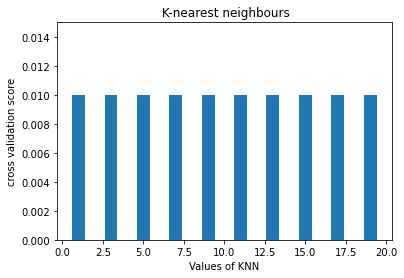

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

k_range=[2*i+1 for i in range (0,10)]
k_score=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(model,x_norm,Y,cv=2)
    k_score.append(score.mean())
plt.bar(k_range,k_score)
plt.xlabel("Values of KNN")
plt.ylabel("cross validation score")
#plt.xlim(.2,1)
plt.ylim(0.000,0.015)
plt.title(" K-nearest neighbours")


SO THE BEST K NEAREST NEIGHBOURS FOR THIS MODEL IS 1 AND THE BEST SCORES IS ABOUT 0.0198 